# Melbourne Real Estate Analysis

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import hvplot.pandas
import seaborn as sns
import os
from plotly.offline import init_notebook_mode, iplot

#import plotly.plotly as py
#import plotly.figure_factory as FF
#import plotly.plotly as py
from plotly import tools
import plotly.graph_objs as go
import matplotlib.pyplot as plt

#import folium
#from folium.features import DivIcon
#from folium.plugins import HeatMap
import warnings
import datetime

#import squarify
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

%matplotlib inline

## 1. Data Clean

In [2]:
dt_p = Path("./Melbourne_housing_FULL.csv")

In [3]:
# Reading whale returns
pty_df = pd.read_csv(dt_p, parse_dates=['Date'], infer_datetime_format=True)
pty_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
pty_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [5]:
pty_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [6]:
display(pty_df.count())

Suburb           34857
Address          34857
Rooms            34857
Type             34857
Price            27247
Method           34857
SellerG          34857
Date             34857
Distance         34856
Postcode         34856
Bedroom2         26640
Bathroom         26631
Car              26129
Landsize         23047
BuildingArea     13742
YearBuilt        15551
CouncilArea      34854
Lattitude        26881
Longtitude       26881
Regionname       34854
Propertycount    34854
dtype: int64

In [7]:
pty_df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [8]:
#Percentage of NAs in the column with most NA
(pty_df['BuildingArea'].isnull().sum()/pty_df['BuildingArea'].isnull().count())*100

60.576067934704646

In [9]:
pty_df.drop(columns=['BuildingArea', 'YearBuilt'],inplace=True)

In [10]:
#count number of records/ data size for analysis
pty_df.dropna().count()

Suburb           17679
Address          17679
Rooms            17679
Type             17679
Price            17679
Method           17679
SellerG          17679
Date             17679
Distance         17679
Postcode         17679
Bedroom2         17679
Bathroom         17679
Car              17679
Landsize         17679
CouncilArea      17679
Lattitude        17679
Longtitude       17679
Regionname       17679
Propertycount    17679
dtype: int64

In [11]:
# To confirm sample size and commit
pty_df=pty_df.dropna().copy()
pty_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34849,Wollert,35 Kingscote Wy,3,h,570000.0,SP,RW,2018-02-24,25.5,3750.0,3.0,2.0,2.0,404.0,Whittlesea City Council,-37.61031,145.03393,Northern Metropolitan,2940.0
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,2018-02-24,6.3,3013.0,4.0,1.0,3.0,593.0,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,2018-02-24,6.3,3013.0,2.0,2.0,1.0,98.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,2018-02-24,6.3,3013.0,2.0,1.0,2.0,220.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0


In [12]:
pty_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34849,Wollert,35 Kingscote Wy,3,h,570000.0,SP,RW,2018-02-24,25.5,3750.0,3.0,2.0,2.0,404.0,Whittlesea City Council,-37.61031,145.03393,Northern Metropolitan,2940.0
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,2018-02-24,6.3,3013.0,4.0,1.0,3.0,593.0,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,2018-02-24,6.3,3013.0,2.0,2.0,1.0,98.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,2018-02-24,6.3,3013.0,2.0,1.0,2.0,220.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0


## 2. Geographical Analysis

In [13]:
pty_df['Date']= pd.to_datetime(pty_df['Date'], format = '%Y-%m-%d')
pty_df['Month'] = pty_df['Date'].dt.month
pty_df['Year'] = pty_df['Date'].dt.year

In [14]:
geo_pty_df=pd.DataFrame(pty_df.groupby(['Regionname','Type'])['Date'].count())
geo_pty_df.rename(columns={"Date": "Values"},inplace=True)
geo_pty_df

Values
Regionname                 Type        
Eastern Metropolitan       h       1792
                           t        135
                           u        183
Eastern Victoria           h        102
                           u          3
Northern Metropolitan      h       3861
                           t        354
                           u        839
Northern Victoria          h        103
                           u          1
South-Eastern Metropolitan h        713
                           t         33
                           u         39
Southern Metropolitan      h       3483
                           t        491
                           u       1554
Western Metropolitan       h       3222
                           t        282
                           u        426
Western Victoria           h         63

In [15]:
layoutA = geo_pty_df.hvplot.bar(
    x='Regionname',
    y='Values',
    by='Type',
    #groupby='Type',
    stacked=True,
    cmap='Category20',
    legend='bottom',
   grid=True,
    width=1000,
    height=500,
    xlabel=''
)

In [16]:
# make plots nicer so they look more like a clustered barchart
plotA = layoutA.opts(title='Number of Real Estates sold across 2017 and 2018',xrotation=45)
plotA

:Bars   [Regionname,Type]   (Values)

In [17]:
pd.pivot_table(pty_df, values=['Landsize','Price'], index=['Regionname'],
                       columns=['Type'], aggfunc="max")

Landsize                         Price             \
Type                               h        t        u           h          t   
Regionname                                                                      
Eastern Metropolitan          5022.0   2040.0   4497.0   4600000.0  1900000.0   
Eastern Victoria             76000.0      NaN    460.0   2300000.0        NaN   
Northern Metropolitan       433014.0  15900.0  15900.0   4525000.0  1750000.0   
Northern Victoria           146699.0      NaN    315.0   1355000.0        NaN   
South-Eastern Metropolitan    7514.0    435.0   3160.0   9000000.0  2006000.0   
Southern Metropolitan        75100.0   2835.0  21715.0  11200000.0  3820000.0   
Western Metropolitan         89030.0   4931.0  37000.0   3900000.0  1731000.0   
Western Victoria              2148.0      NaN      NaN   1152000.0        NaN   

                                       
Type                                u  
Regionname                             
Eastern Metropolitan        1500000.0  
Eastern Victoria             537000.0  
Northern Metropolitan       2250000.0  
Northern Victoria            530000.0  
South-Eastern Metropolitan   815000.0  
Southern Metropolitan       3625000.0  
Western Metropolitan        1170000.0  
Western Victoria                  NaN

In [18]:
pd.pivot_table(pty_df, values=['Landsize','Price'], index=['Regionname'],
                       columns=['Type'], aggfunc="min")

Landsize                 Price                    
Type                              h    t      u         h         t         u
Regionname                                                                   
Eastern Metropolitan            0.0  0.0    0.0  330000.0  370000.0  288000.0
Eastern Victoria                0.0  NaN  196.0  410500.0       NaN  400000.0
Northern Metropolitan           0.0  0.0    0.0  145000.0  310000.0  170000.0
Northern Victoria             151.0  NaN  315.0  330000.0       NaN  530000.0
South-Eastern Metropolitan      0.0  0.0    0.0  400000.0  386000.0  266000.0
Southern Metropolitan           0.0  0.0    0.0  131000.0  345000.0  160000.0
Western Metropolitan            0.0  0.0    0.0  280000.0  300000.0   85000.0
Western Victoria              180.0  NaN    NaN  280500.0       NaN       NaN

In [19]:
pd.pivot_table(pty_df, values=['Landsize','Price'], index=['Regionname'],
                       columns=['Type'], aggfunc="mean")

Landsize                                 Price  \
Type                                  h           t           u             h   
Regionname                                                                      
Eastern Metropolitan         736.959263  271.414815  333.513661  1.203706e+06   
Eastern Victoria            2524.470588         NaN  295.333333  7.192351e+05   
Northern Metropolitan        592.534059  325.689266  501.110846  9.866868e+05   
Northern Victoria           4623.155340         NaN  315.000000  6.300049e+05   
South-Eastern Metropolitan   672.283310  223.363636  365.820513  9.436002e+05   
Southern Metropolitan        589.672983  289.894094  466.036680  1.857115e+06   
Western Metropolitan         548.987275  245.680851  553.164319  9.360011e+05   
Western Victoria             711.444444         NaN         NaN  4.416706e+05   

                                                         
Type                                   t              u  
Regionname                                               
Eastern Metropolitan        8.800826e+05  649954.098361  
Eastern Victoria                     NaN  461333.333333  
Northern Metropolitan       7.510336e+05  544627.209774  
Northern Victoria                    NaN  530000.000000  
South-Eastern Metropolitan  9.369621e+05  580243.589744  
Southern Metropolitan       1.222651e+06  666562.514801  
Western Metropolitan        7.334922e+05  491522.638498  
Western Victoria                     NaN            NaN

In [20]:
pd.pivot_table(pty_df, values=['Rooms','Bedroom2','Bathroom','Car','Landsize'], index=['Regionname']
                #,columns=['Type']
               , aggfunc="mean")

,Bathroom,Bedroom2,Car,Landsize,Rooms
Regionname,,,,,
Eastern Metropolitan,1.761611,3.414692,1.868246,672.182464,3.413270
Eastern Victoria,1.809524,3.514286,2.057143,2460.780952,3.514286
Northern Metropolitan,1.417887,2.859517,1.546498,558.666403,2.876533
Northern Victoria,1.903846,3.519231,2.144231,4581.730769,3.519231
South-Eastern Metropolitan,1.687898,3.398726,2.043312,638.185987,3.400000
Southern Metropolitan,1.674023,2.947178,1.648336,528.290521,2.969609
Western Metropolitan,1.544275,3.081934,1.777863,527.676081,3.106870
Western Victoria,1.460317,3.476190,2.095238,711.444444,3.476190


<Axes: >

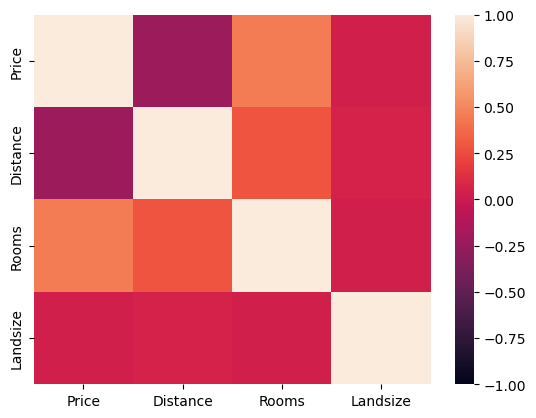

In [21]:
#Overall Correlation
#pty_df['Num_Rm']=pty_df['Bathroom']+pty_df['Bedroom2']+pty_df['Car']
correlation_price_distance=pty_df[['Price','Distance','Rooms','Landsize']].corr()
sns.heatmap(correlation_price_distance, vmin=-1, vmax=1)

In [22]:
#Region Specific Correlation
nm_pty_df = pty_df[(pty_df['Regionname'] == 'Northern Metropolitan')]
sm_pty_df = pty_df[(pty_df['Regionname'] == 'Southern Metropolitan')]
em_pty_df = pty_df[(pty_df['Regionname'] == 'Eastern Metropolitan')]
wm_pty_df = pty_df[(pty_df['Regionname'] == 'Western Metropolitan')]
sem_pty_df = pty_df[(pty_df['Regionname'] == 'South-Eastern Metropolitan')]
nv_pty_df = pty_df[(pty_df['Regionname'] == 'Northern Victoria')]
ev_pty_df = pty_df[(pty_df['Regionname'] == 'Eastern Victoria')]
wv_pty_df = pty_df[(pty_df['Regionname'] == 'Western Victoria')]
nm_correlation_price_distance=nm_pty_df[['Price','Distance','Rooms']].corr()
sm_correlation_price_distance=sm_pty_df[['Price','Distance','Rooms']].corr()
em_correlation_price_distance=em_pty_df[['Price','Distance','Rooms']].corr()
wm_correlation_price_distance=wm_pty_df[['Price','Distance','Rooms']].corr()
sem_correlation_price_distance=sem_pty_df[['Price','Distance','Rooms']].corr()
nv_correlation_price_distance=nv_pty_df[['Price','Distance','Rooms']].corr()
ev_correlation_price_distance=ev_pty_df[['Price','Distance','Rooms']].corr()
wv_correlation_price_distance=wv_pty_df[['Price','Distance','Rooms']].corr()

<Axes: title={'center': 'Western Victoria'}>

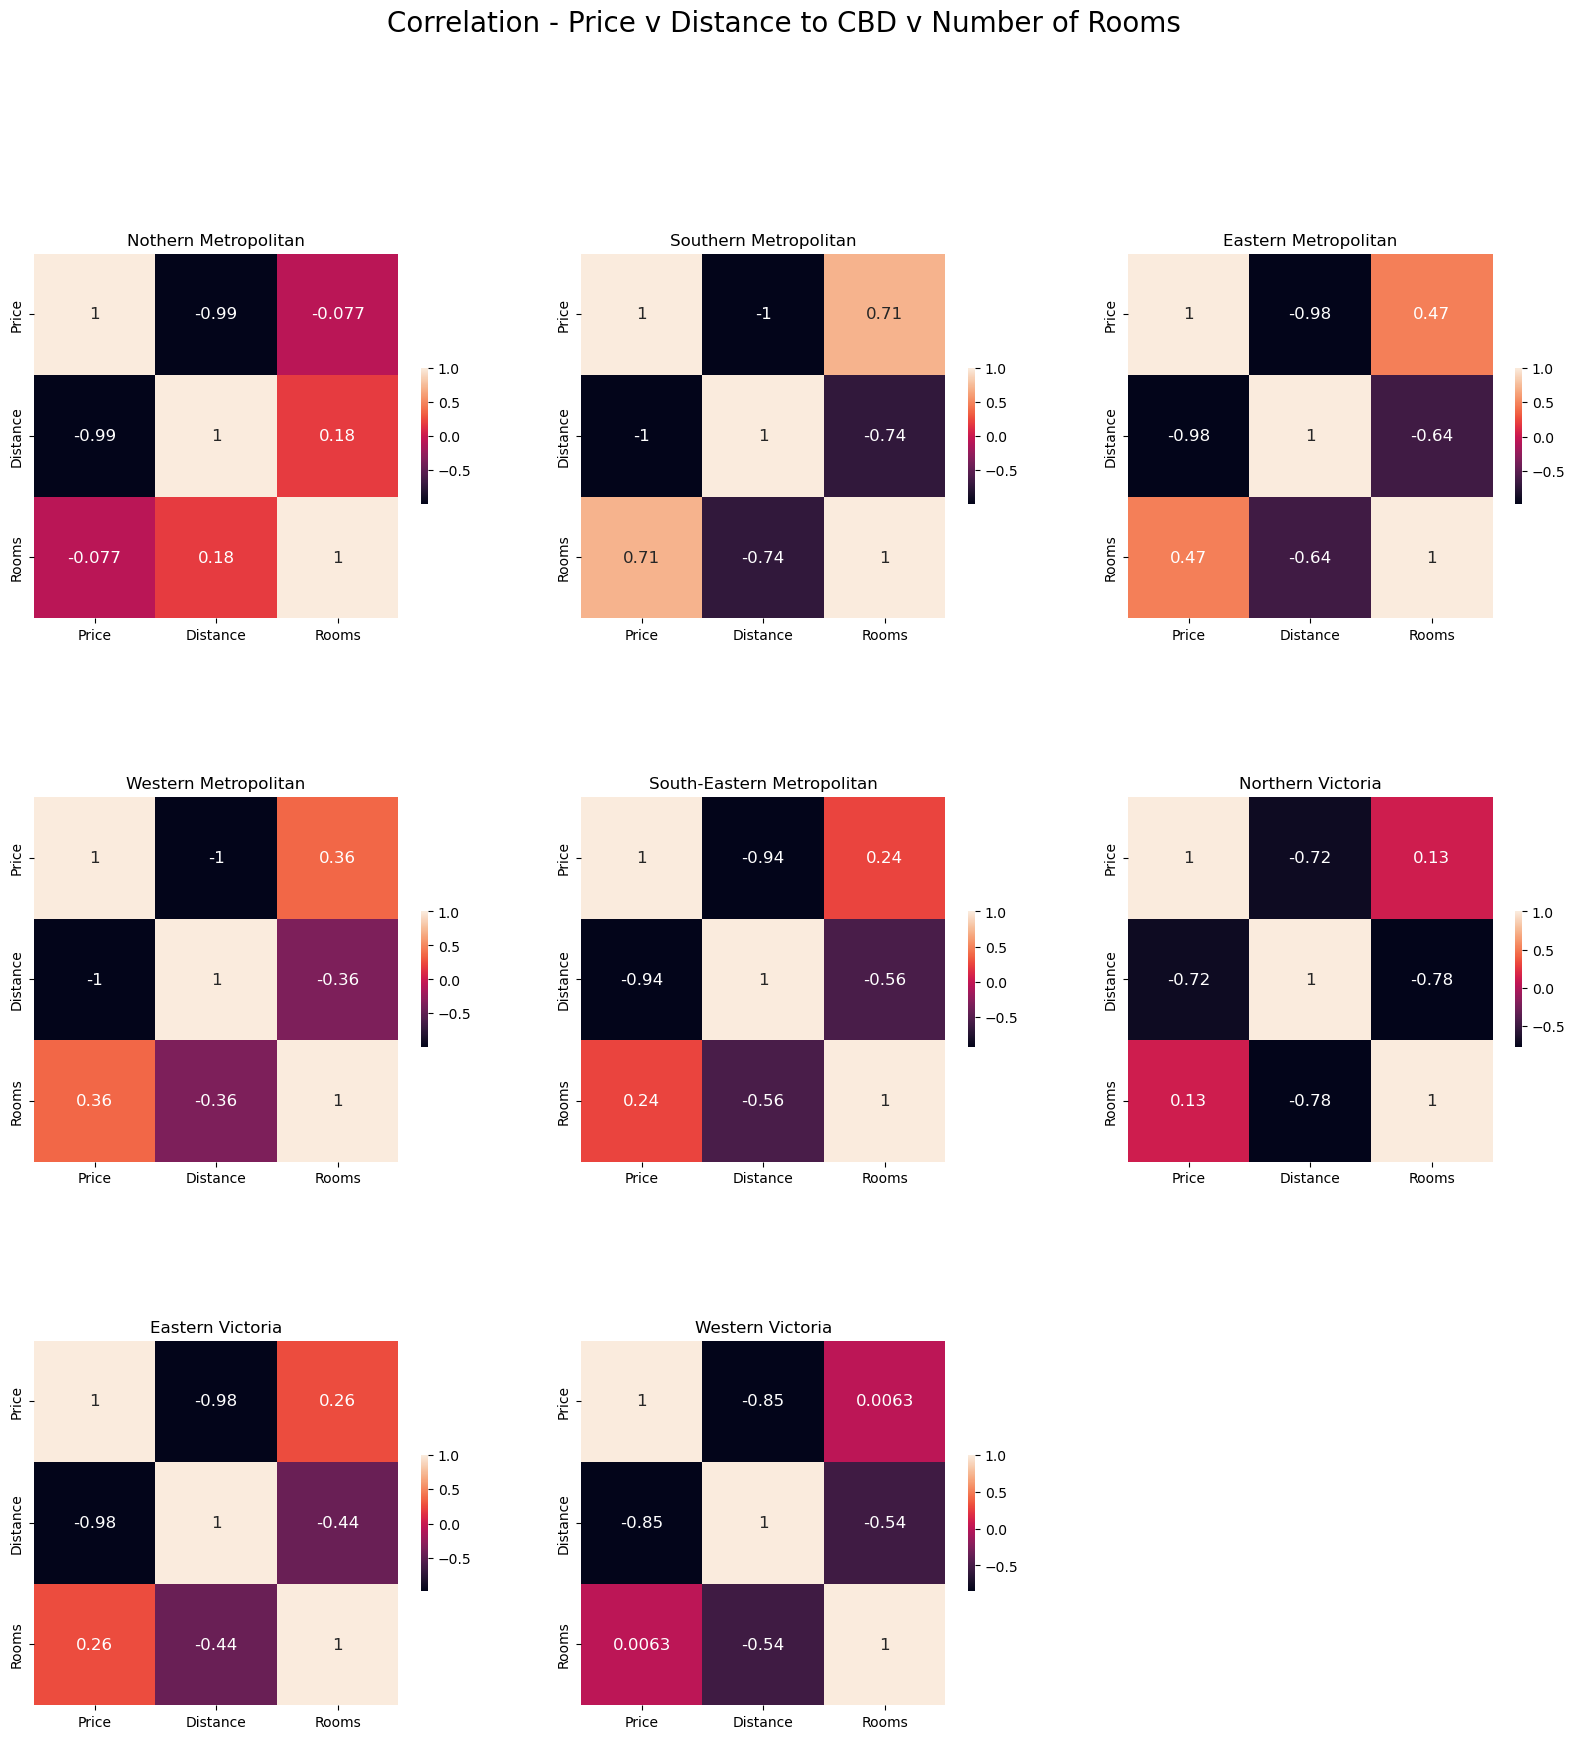

In [23]:
# Here we create a figure instance, and two subplots
fig = plt.figure(figsize = (20,20)) # width x height
fig.suptitle('Correlation - Price v Distance to CBD v Number of Rooms', fontsize=20)
ax1 = fig.add_subplot(3, 3, 1) # row, column, position
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)
ax7 = fig.add_subplot(3, 3, 7)
ax8 = fig.add_subplot(3, 3, 8)
ax1.title.set_text('Nothern Metropolitan')
ax2.title.set_text('Southern Metropolitan')
ax3.title.set_text('Eastern Metropolitan')
ax4.title.set_text('Western Metropolitan')
ax5.title.set_text('South-Eastern Metropolitan')
ax6.title.set_text('Northern Victoria')
ax7.title.set_text('Eastern Victoria')
ax8.title.set_text('Western Victoria')
# We use ax parameter to tell seaborn which subplot to use for this plot
sns.heatmap(data=nm_correlation_price_distance.corr(), ax=ax1, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})
sns.heatmap(data=sm_correlation_price_distance.corr(), ax=ax2, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})
sns.heatmap(data=em_correlation_price_distance.corr(), ax=ax3, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})
sns.heatmap(data=wm_correlation_price_distance.corr(), ax=ax4, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})
sns.heatmap(data=sem_correlation_price_distance.corr(), ax=ax5, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})
sns.heatmap(data=nv_correlation_price_distance.corr(), ax=ax6, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})
sns.heatmap(data=ev_correlation_price_distance.corr(), ax=ax7, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})
sns.heatmap(data=wv_correlation_price_distance.corr(), ax=ax8, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})

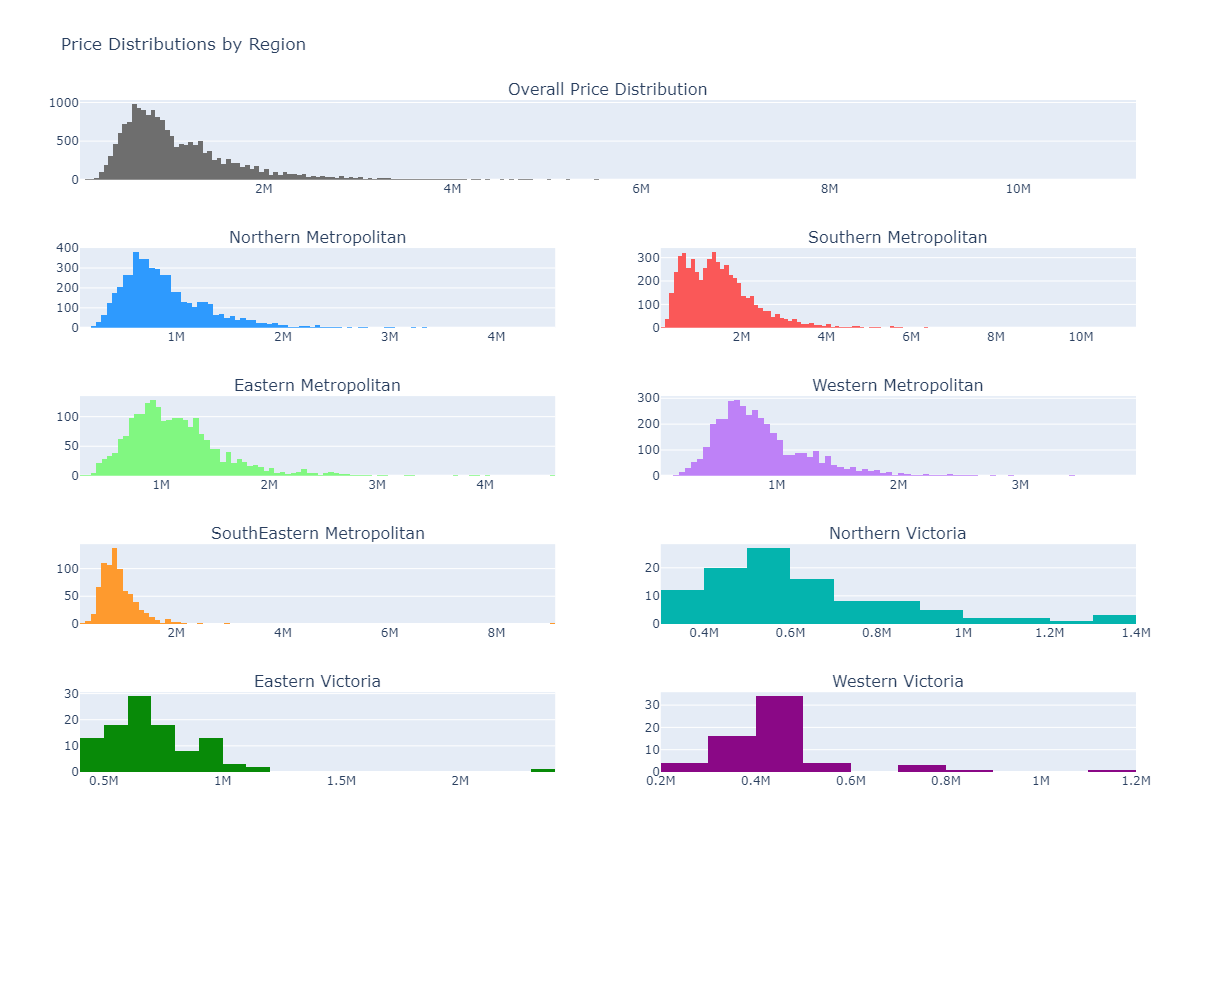

In [24]:
# Price by Region
all_regions = pty_df['Price'].values
northern_metropolitan = pty_df['Price'].loc[pty_df['Regionname'] == 'Northern Metropolitan'].values
southern_metropolitan = pty_df['Price'].loc[pty_df['Regionname'] == 'Southern Metropolitan'].values
eastern_metropolitan = pty_df['Price'].loc[pty_df['Regionname'] == 'Eastern Metropolitan'].values
western_metropolitan = pty_df['Price'].loc[pty_df['Regionname'] == 'Western Metropolitan'].values
southeastern_metropolitan = pty_df['Price'].loc[pty_df['Regionname'] == 'South-Eastern Metropolitan'].values
northern_victoria = pty_df['Price'].loc[pty_df['Regionname'] == 'Northern Victoria'].values
eastern_victoria = pty_df['Price'].loc[pty_df['Regionname'] == 'Eastern Victoria'].values
western_victoria = pty_df['Price'].loc[pty_df['Regionname'] == 'Western Victoria'].values


# Histograms
overall_price_plot = go.Histogram(
    x=all_regions,
   # histnorm='count', 
    name='All Regions',
    marker=dict(
        color='#6E6E6E'
    )
)


northern_metropolitan_plot = go.Histogram(
    x=northern_metropolitan,
  #  histnorm='count', 
    name='Northern Metropolitan',
    marker=dict(
        color='#2E9AFE'
    )
)

southern_metropolitan_plot = go.Histogram(
    x=southern_metropolitan,
  #  histnorm='count', 
    name='Southern Metropolitan',
    marker=dict(
        color='#FA5858'
    )
)


eastern_metropolitan_plot = go.Histogram(
    x=eastern_metropolitan,
    #histnorm='count', 
    name='Eastern Metropolitan',
    marker=dict(
        color='#81F781'
    )
)

western_metropolitan_plot = go.Histogram(
    x=western_metropolitan,
    #histnorm='count', 
    name='Western Metropolitan',
    marker=dict(
        color='#BE81F7'
    )
)

southeastern_metropolitan_plot = go.Histogram(
    x=southeastern_metropolitan,
    #histnorm='count', 
    name='SouthEastern Metropolitan',
    marker=dict(
        color='#FE9A2E'
    )
)

northern_victoria_plot = go.Histogram(
    x=northern_victoria,
    #histnorm='count', 
    name='Northern Victoria',
    marker=dict(
        color='#04B4AE'
    )
)

eastern_victoria_plot = go.Histogram(
    x=eastern_victoria,
    #histnorm='count', 
    name='Eastern Victoria',
    marker=dict(
        color='#088A08'
    )
)


western_victoria_plot = go.Histogram(
    x=western_victoria,
    #histnorm='count', 
    name='Western Victoria',
    marker=dict(
        color='#8A0886'
    )
)

fig = tools.make_subplots(rows=6, cols=2, print_grid=False, specs=[[{'colspan': 2}, None], [{}, {}], [{}, {}], [{}, {}], [{}, {}], [{'colspan': 2}, None]],
                         subplot_titles=(
                             'Overall Price Distribution',
                             'Northern Metropolitan',
                             'Southern Metropolitan',
                             'Eastern Metropolitan',
                             'Western Metropolitan',
                             'SouthEastern Metropolitan',
                             'Northern Victoria',
                             'Eastern Victoria',
                             'Western Victoria',
                             ))
fig.append_trace(overall_price_plot, 1, 1)
fig.append_trace(northern_metropolitan_plot, 2, 1)
fig.append_trace(southern_metropolitan_plot, 2, 2)
fig.append_trace(eastern_metropolitan_plot, 3, 1)
fig.append_trace(western_metropolitan_plot, 3, 2)
fig.append_trace(southeastern_metropolitan_plot, 4, 1)
fig.append_trace(northern_victoria_plot, 4, 2)
fig.append_trace(eastern_victoria_plot, 5, 1)
fig.append_trace(western_victoria_plot, 5, 2)

fig['layout'].update(showlegend=False, title="Price Distributions by Region",
                    height=1000, width=800)
iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

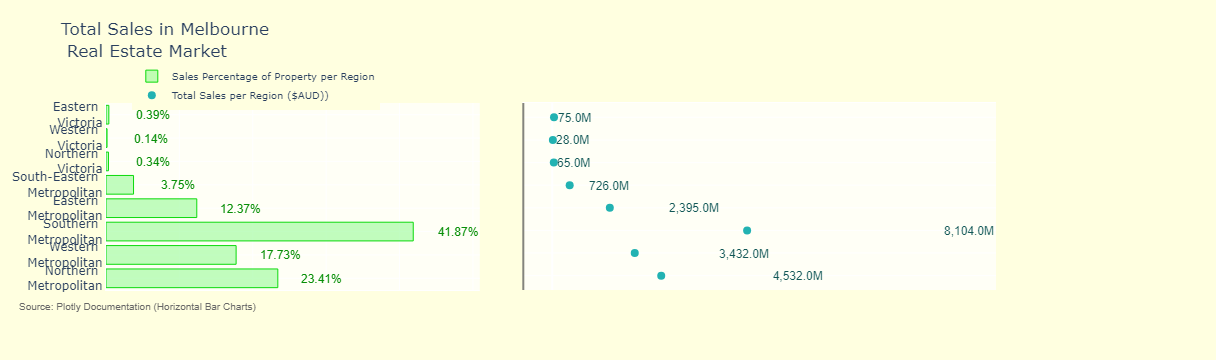

In [25]:
total_sales = pty_df['Price'].sum()/1000000
def region_sales_percentage(pty_df, region, sales=total_sales):
    sales_percentage = (pty_df['Price'].loc[pty_df['Regionname'] == region].sum()/1000000/sales) * 100
    return sales_percentage

# Sales percentage per Region
northernmet_salesper = region_sales_percentage(pty_df, region='Northern Metropolitan')
westernmet_salesper = region_sales_percentage(pty_df, region='Western Metropolitan')
southernmet_salesper = region_sales_percentage(pty_df, region='Southern Metropolitan')
easternmet_salesper = region_sales_percentage(pty_df, region='Eastern Metropolitan')
south_easternmet_salesper = region_sales_percentage(pty_df, region='South-Eastern Metropolitan')
northernvic_salesper = region_sales_percentage(pty_df, region='Northern Victoria')
westernvic_salesper = region_sales_percentage(pty_df, region='Western Victoria')
easternvic_salesper = region_sales_percentage(pty_df, region='Eastern Victoria')
# Total Sales Sum per Region
nothernmet_total_sales = round(pty_df['Price'].loc[pty_df['Regionname'] == 'Northern Metropolitan'].sum()/1000000,2)
westernmet_total_sales = round(pty_df['Price'].loc[pty_df['Regionname'] == 'Western Metropolitan'].sum()/1000000,2)
southernmet_total_sales = round(pty_df['Price'].loc[pty_df['Regionname'] == 'Southern Metropolitan'].sum()/1000000,2)
easternmet_total_sales = round(pty_df['Price'].loc[pty_df['Regionname'] == 'Eastern Metropolitan'].sum()/1000000,2)
south_easternmet_total_sales = round(pty_df['Price'].loc[pty_df['Regionname'] == 'South-Eastern Metropolitan'].sum()/1000000,2)
northernvic_total_sales = round(pty_df['Price'].loc[pty_df['Regionname'] == 'Northern Victoria'].sum()/1000000,2)
westernvic_total_sales = round(pty_df['Price'].loc[pty_df['Regionname'] == 'Western Victoria'].sum()/1000000,2)
easternvic_total_sales = round(pty_df['Price'].loc[pty_df['Regionname'] == 'Eastern Victoria'].sum()/1000000,2)
labels = ['Northern <br> Metropolitan', 'Western <br> Metropolitan', 'Southern <br> Metropolitan', 'Eastern <br> Metropolitan',
         'South-Eastern <br> Metropolitan', 'Northern <br> Victoria', 'Western <br> Victoria', 'Eastern <br> Victoria']
salesper_data = [northernmet_salesper, westernmet_salesper, southernmet_salesper, easternmet_salesper,
              south_easternmet_salesper, northernvic_salesper, westernvic_salesper, easternvic_salesper]
total_sales_data = [nothernmet_total_sales, westernmet_total_sales, southernmet_total_sales, easternmet_total_sales,
                   south_easternmet_total_sales, northernvic_total_sales, westernvic_total_sales, easternvic_total_sales]
sales_percent_plot = go.Bar(
    x=salesper_data,
    y=labels,
    marker=dict(
        color='rgba(152, 251, 152, 0.6)',
        line=dict(
            color='rgba(12, 218, 12, 1)',
            width=1),
    ),
    name='Sales Percentage of Property per Region',
    orientation='h'
)
total_sales_plot = go.Scatter(
    x=total_sales_data,
    y=labels,
    mode='markers',
    marker=dict(
        color='rgb(34, 178, 178)',
    size=8),
    name='Total Sales per Region ($AUD))'
)
layoutB = go.Layout(
    title='Total Sales in Melbourne <br> Real Estate Market',
    yaxis1=dict(
        showgrid=True,
        showline=True,
        showticklabels=True,
        domain=[0, 0.85],
        tickangle=360,
      #  tickcolor=dict(
      #      color='rgb(255, 108, 108)'
      #  ),
    ),
    yaxis2=dict(
        showgrid=True,
        showline=True,
        showticklabels=False,
        linecolor='rgba(102, 102, 102, 0.8)',
        linewidth=2,
        domain=[0, 0.85],
        tickangle=360
    ),
    xaxis1=dict(
        zeroline=True,
        showline=True,
        showticklabels=False,
        showgrid=True,
        domain=[0, 0.42],
    ),
    xaxis2=dict(
        zeroline=True,
        showline=True,
        showticklabels=False,
        showgrid=True,
        domain=[0.47, 1],
        side='top',
        dtick=25000,
    ),
    legend=dict(
        x=0.029,
        y=1.038,
        font=dict(
            size=10,
        ),
    ),
    margin=dict(
        l=100,
        r=220,
        t=70,
        b=70,
    ),
    paper_bgcolor='rgb(255, 255, 224)',
    plot_bgcolor='rgb(255, 255, 246)',
)
y_s = np.round(salesper_data, decimals=2)
y_nw = np.rint(total_sales_data)
annotations = []
# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, labels):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2',
                            y=xd, x=ydn*2,
                            text='{:,}'.format(ydn) + 'M',
                            ax=50,
                            ay=20,
                            xanchor='left',
                            yanchor='middle',
                            font=dict(family='Arial', size=12,
                                      color='rgb(17, 87, 87)'),
                            showarrow=False,
                           arrowhead=3))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1',
                            y=xd, x=yd + 6,
                            text=str(yd) + '%',
                            font=dict(family='Arial', size=12,
                                      color='rgb(7, 143, 7)'),
                            showarrow=False))
# Source
annotations.append(dict(xref='paper', yref='paper',
                        x=-0.1, y=-0.109,
                        text='Source: Plotly Documentation (Horizontal Bar Charts)',
                        font=dict(family='Arial', size=10,
                                  color='rgb(102, 102, 102)'),
                        showarrow=False))
layoutB['annotations'] = annotations
# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, specs=[[{}, {}]], shared_xaxes=True,
                          shared_yaxes=False, vertical_spacing=0.001)
fig.append_trace(sales_percent_plot, 1, 1)
fig.append_trace(total_sales_plot, 1, 2)
fig['layout'].update(layoutB)
iplot(fig, filename='oecd-networth-saving-bar-line')

In [26]:
tbl_1=pd.pivot_table(pty_df, values=['Date'], index=['Regionname','Suburb','Type']
                      , aggfunc="count" #,margins=True
                     ,fill_value=0).reset_index()
df = pd.merge(left=tbl_1, right=geo_pty_df, how='left', on=['Regionname','Type']) 
df.rename(columns={"Values":"Property_sold","Date":"Unit Sold"},inplace=True)
df['percentage']=df['Unit Sold']/df['Property_sold']*100
df

,Regionname,Suburb,Type,Unit Sold,Property_sold,percentage
0,Eastern Metropolitan,Bayswater,h,16,1792,0.892857
1,Eastern Metropolitan,Bayswater,t,2,135,1.481481
2,Eastern Metropolitan,Bayswater,u,3,183,1.639344
3,Eastern Metropolitan,Bayswater North,h,9,1792,0.502232
4,Eastern Metropolitan,Bayswater North,u,2,183,1.092896
...,...,...,...,...,...,...
723,Western Metropolitan,Yarraville,u,16,426,3.755869
724,Western Victoria,Bacchus Marsh,h,3,63,4.761905
725,Western Victoria,Brookfield,h,2,63,3.174603
726,Western Victoria,Melton,h,19,63,30.158730


In [27]:
tbl_2=pd.pivot_table(pty_df, values=['Date'], index=['Regionname','Suburb']
                      , aggfunc="count" #,margins=True
                     ,fill_value=0).reset_index()

df2 = pd.merge(left=tbl_2, right=geo_pty_df.groupby('Regionname').sum(), how='left', on=['Regionname']) 
df2.rename(columns={"Values":"Property_sold","Date":"Unit Sold"},inplace=True)
df2['percentage']=df2['Unit Sold']/df2['Property_sold']*100
with pd.option_context('display.max_rows', None,):
   print(df2[['Regionname','Suburb','percentage']].sort_values(by=['Regionname','percentage'], ascending=False))

                     Regionname              Suburb  percentage
332            Western Victoria        Melton South   61.904762
331            Western Victoria              Melton   30.158730
329            Western Victoria       Bacchus Marsh    4.761905
330            Western Victoria          Brookfield    3.174603
276        Western Metropolitan            Essendon    6.488550
328        Western Metropolitan          Yarraville    4.834606
295        Western Metropolitan        Moonee Ponds    4.580153
296        Western Metropolitan             Newport    4.147583
264        Western Metropolitan          Ascot Vale    4.045802
287        Western Metropolitan         Keilor East    4.045802
279        Western Metropolitan           Footscray    3.816794
310        Western Metropolitan            Sunshine    3.358779
325        Western Metropolitan        Williamstown    3.358779
322        Western Metropolitan      West Footscray    3.307888
294        Western Metropolitan         

In [28]:
# Recreating the tables as provided
df2 = pd.merge(left=tbl_2, right=geo_pty_df.groupby('Regionname').sum(), how='left', on=['Regionname'])
df2.rename(columns={"Values": "Property_sold", "Date": "Unit Sold"}, inplace=True)
df2['percentage'] = df2['Unit Sold'] / df2['Property_sold'] * 100

# Grouping by 'Regionname' and selecting the top 3 suburbs for each region based on percentage
grouped_by_region = df2.groupby('Regionname')
top_5_by_region = grouped_by_region.apply(lambda x: x.nlargest(3, 'percentage'))

# Resetting the multi-index for better display
top_5_by_region.reset_index(drop=True, inplace=True)

# Displaying the result as a table (grouped by 'Regionname')
top_5_by_region[['Regionname', 'Suburb', 'percentage']]

,Regionname,Suburb,percentage
0,Eastern Metropolitan,Doncaster,6.492891
1,Eastern Metropolitan,Templestowe Lower,5.639810
2,Eastern Metropolitan,Ivanhoe,5.071090
3,Eastern Victoria,Mooroolbark,24.761905
4,Eastern Victoria,Berwick,22.857143
5,Eastern Victoria,Frankston North,9.523810
6,Northern Metropolitan,Reservoir,8.527899
7,Northern Metropolitan,Preston,5.678670
8,Northern Metropolitan,Richmond,5.579739
9,Northern Victoria,Doreen,23.076923


In [29]:
rg_pty_df=pty_df.groupby(['Regionname','Suburb']).agg({'Price':'mean', 'Date':'count','Landsize':'mean','Longtitude':'mean','Lattitude':'mean'}).rename(columns={'Date':'Count'})
rg_pty_df

Price  Count    Landsize  \
Regionname           Suburb                                             
Eastern Metropolitan Bayswater        7.757381e+05     21  648.190476   
                     Bayswater North  7.290000e+05     11  642.181818   
                     Bellfield        8.359737e+05     19  607.789474   
                     Blackburn        1.335568e+06     37  664.756757   
                     Blackburn North  1.171920e+06     25  621.560000   
...                                            ...    ...         ...   
Western Metropolitan Yarraville       1.015384e+06    190  336.536842   
Western Victoria     Bacchus Marsh    3.823333e+05      3  845.666667   
                     Brookfield       4.970000e+05      2  673.000000   
                     Melton           4.358684e+05     19  704.263158   
                     Melton South     4.462244e+05     39  706.589744   

                                      Longtitude  Lattitude  
Regionname           Suburb                                  
Eastern Metropolitan Bayswater        145.259910 -37.848722  
                     Bayswater North  145.287438 -37.826857  
                     Bellfield        145.040165 -37.752365  
                     Blackburn        145.151737 -37.820352  
                     Blackburn North  145.154982 -37.805843  
...                                          ...        ...  
Western Metropolitan Yarraville       144.884201 -37.816857  
Western Victoria     Bacchus Marsh    144.431667 -37.669177  
                     Brookfield       144.549825 -37.694535  
                     Melton           144.578396 -37.683477  
                     Melton South     144.572923 -37.704737  

[333 rows x 5 columns]

In [30]:
rg_pty_df.hvplot.points(
    'Longtitude', 
    'Lattitude', 
    hover_cols=['Suburb'],
    geo=True, 
    size='Count',
    color='Price',
    tiles='OSM',
    frame_width=800,
    frame_height=600,
    title='Housing Market in Melb'
    )

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longtitude,Lattitude]   (Price,Count,Suburb)

## 2.Property Analysis

In [31]:
pty_df.iloc[0]

Suburb                      Abbotsford
Address                   85 Turner St
Rooms                                2
Type                                 h
Price                        1480000.0
Method                               S
SellerG                         Biggin
Date               2016-03-12 00:00:00
Distance                           2.5
Postcode                        3067.0
Bedroom2                           2.0
Bathroom                           1.0
Car                                1.0
Landsize                         202.0
CouncilArea         Yarra City Council
Lattitude                     -37.7996
Longtitude                    144.9984
Regionname       Northern Metropolitan
Propertycount                   4019.0
Month                                3
Year                              2016
Name: 1, dtype: object

In [32]:
pty_df.set_index(pty_df["Price"], pty_df["Suburb"])

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month,Year
Price,,,,,,,,,,,,,,,,,,,,,
1480000.0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,1.0,1.0,202.0,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,3,2016
1035000.0,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,1.0,0.0,156.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,4,2016
1465000.0,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,2.0,0.0,134.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,4,2017
850000.0,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,...,2.0,1.0,94.0,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0,4,2017
1600000.0,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,...,1.0,2.0,120.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0,4,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570000.0,Wollert,35 Kingscote Wy,3,h,570000.0,SP,RW,2018-02-24,25.5,3750.0,...,2.0,2.0,404.0,Whittlesea City Council,-37.61031,145.03393,Northern Metropolitan,2940.0,2,2018
1480000.0,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,2018-02-24,6.3,3013.0,...,1.0,3.0,593.0,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,2,2018
888000.0,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,2018-02-24,6.3,3013.0,...,2.0,1.0,98.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,2,2018


In [33]:
# In which suburb and postcode combination do properties have the largest average land size?
suburb_avg_size = pty_df.groupby("Suburb")["Landsize"].mean().round(2)
suburb_avg_size
sorted_suburbs_size = suburb_avg_size.sort_values(ascending=False)
sorted_suburbs_size

Suburb
Wildwood           89030.00
Bullengarook       64499.67
Silvan             57245.00
Wandin North       40500.00
Gisborne South     40468.50
                     ...   
Albert Park          198.75
West Melbourne       181.75
South Melbourne      171.31
Wonga Park             0.00
Docklands              0.00
Name: Landsize, Length: 333, dtype: float64

In [34]:
suburb_avg_price = pty_df.groupby("Suburb")["Price"].mean().round(2)
suburb_avg_price

Suburb
Abbotsford      1074862.90
Aberfeldie      1366471.70
Airport West     789666.68
Albanvale        540357.14
Albert Park     1988705.48
                   ...    
Wonga Park       900000.00
Wyndham Vale     478000.00
Yallambie        841589.29
Yarra Glen       620000.00
Yarraville      1015383.92
Name: Price, Length: 333, dtype: float64

In [35]:
sorted_suburbs_price = suburb_avg_price.sort_values(ascending=False)
sorted_suburbs_price

Suburb
Kooyong          2423333.33
Middle Park      2352047.62
Canterbury       2308133.33
Deepdene         2280000.00
Brighton         2105992.77
                    ...    
Melton West       456421.05
Melton South      446224.36
Melton            435868.42
Kurunjang         393875.00
Bacchus Marsh     382333.33
Name: Price, Length: 333, dtype: float64

In [36]:
# Create bins and labels
bins = [0, 300, 1000, 2000, pty_df['Landsize'].max()]
labels = ['<300', '300-1000', '1000-2000', '2000+']
# Use pd.cut to categorize the data
pty_df['Landsize_range'] = pd.cut(pty_df['Landsize'], bins=bins, labels=labels, include_lowest=True)
pty_df.sort_values("Price", ascending=False)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month,Year,Landsize_range
25635,Brighton,6 Cole St,4,h,11200000.0,VB,hockingstuart,2017-10-28,10.5,3186.0,...,2.0,1400.0,Bayside City Council,-37.89335,144.98643,Southern Metropolitan,10579.0,10,2017,1000-2000
19583,Mulgrave,35 Bevis St,3,h,9000000.0,PI,Hall,2017-07-29,18.8,3170.0,...,1.0,744.0,Monash City Council,-37.93168,145.16126,South-Eastern Metropolitan,7113.0,7,2017,300-1000
12539,Canterbury,49 Mangarra Rd,5,h,8000000.0,VB,Sotheby's,2017-05-13,9.0,3126.0,...,4.0,2079.0,Boroondara City Council,-37.81790,145.06940,Southern Metropolitan,3265.0,5,2017,2000+
15696,Hawthorn,49 Lisson Gr,4,h,7650000.0,S,Abercromby's,2017-06-17,5.3,3122.0,...,4.0,1690.0,Boroondara City Council,-37.82652,145.03052,Southern Metropolitan,11308.0,6,2017,1000-2000
5937,Kew,15 Barry St,6,h,6500000.0,S,Jellis,2016-08-13,5.6,3101.0,...,3.0,1334.0,Boroondara City Council,-37.80290,145.02670,Southern Metropolitan,10331.0,8,2016,1000-2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12947,Hawthorn,17/17 Park St,1,u,160000.0,VB,HAR,2017-08-04,4.6,3122.0,...,0.0,322.0,Boroondara City Council,-37.81980,145.03730,Southern Metropolitan,11308.0,8,2017,300-1000
3290,Coburg,171 Moreland Rd,4,h,145000.0,PI,Jellis,2016-04-06,7.8,3058.0,...,1.0,536.0,Darebin City Council,-37.75550,144.96580,Northern Metropolitan,11204.0,4,2016,300-1000
11859,Albion,8/6 Ridley St,1,u,145000.0,PI,Biggin,2016-05-28,13.9,3020.0,...,1.0,36.0,Brimbank City Council,-37.78330,144.82660,Western Metropolitan,2185.0,5,2016,<300
3063,Caulfield,30 Pyne St,4,h,131000.0,PI,Rodney,2017-02-25,8.9,3162.0,...,2.0,499.0,Glen Eira City Council,-37.88640,145.02420,Southern Metropolitan,2379.0,2,2017,300-1000


In [37]:
# to count the occurrence of each room type and identify the most popular one.
most_popular_room = pty_df['Rooms'].value_counts().idxmax()
print(f"The most popular room type is: {most_popular_room}")

The most popular room type is: 3


In [38]:
# to count the occurrence of landsize and identify the most popular one.
most_popular_Landsize_range = pty_df['Landsize_range'].value_counts().idxmax()
print(f"The most popular landsize range is :{most_popular_Landsize_range}")

The most popular landsize range is :300-1000


In [39]:
# To find most popular suburb
most_popular_suburb = pty_df['Suburb'].value_counts().idxmax()
print(f"The most popular suburb is :{most_popular_suburb}")

The most popular suburb is :Reservoir


In [40]:
# Assuming you have a DataFrame named 'df'
under_300 = pty_df[pty_df['Landsize'] < 300]
between_300_1000 = pty_df[(pty_df['Landsize'] >= 300) & (pty_df['Landsize'] <= 1000)]
count_under_300 = under_300['Suburb'].value_counts()
count_between_300_1000 = between_300_1000['Suburb'].value_counts()
suburb_most_under_300 = count_under_300.idxmax()
suburb_most_between_300_1000 = count_between_300_1000.idxmax()
print(f"The suburb with the most properties with land size under 300 sqm is: {suburb_most_under_300}")
print(f"The suburb with the most properties with land size between 300-1000 sqm is: {suburb_most_between_300_1000}")

The suburb with the most properties with land size under 300 sqm is: Richmond
The suburb with the most properties with land size between 300-1000 sqm is: Reservoir


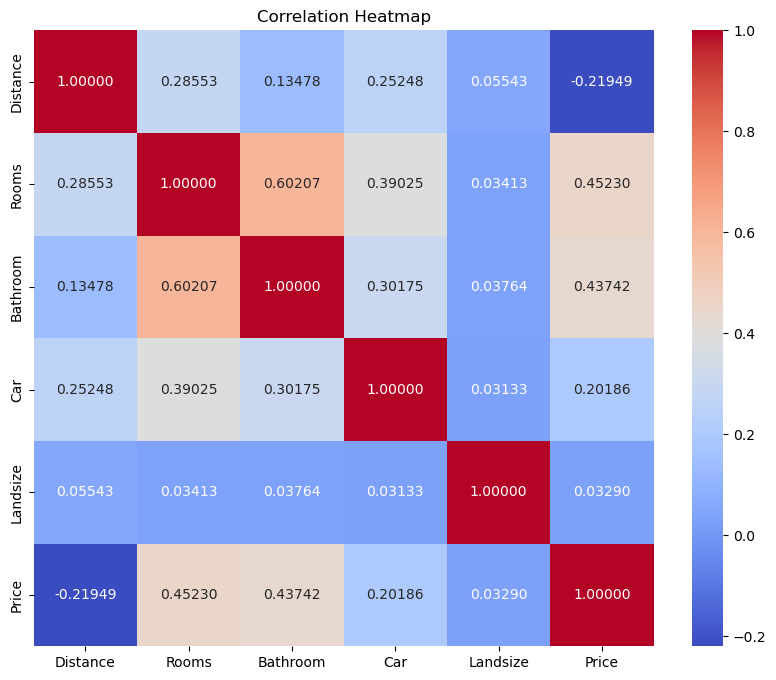

In [41]:
# Calculate correlations
correlation_matrix = pty_df[['Suburb', 'Distance', 'Rooms', 'Bathroom', 'Car', 'Landsize', 'Price']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".5f")
plt.title("Correlation Heatmap")
plt.show()

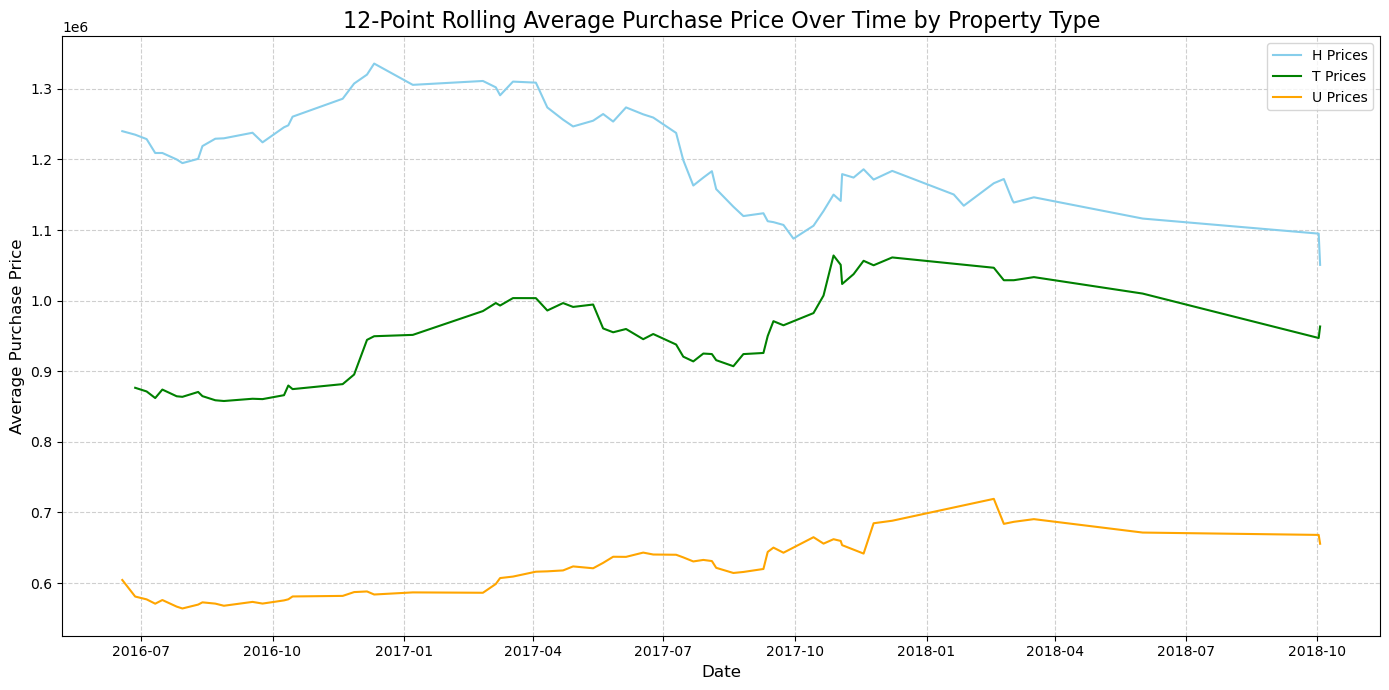

In [42]:
# Convert 'Date' to datetime if it's not already
pty_df['Date'] = pd.to_datetime(pty_df['Date'])

# Sort the DataFrame by 'Date'
pty_df_sorted = pty_df.sort_values(by='Date')

# Group by 'Date' and 'Type', then calculate the average price
avg_price_by_type_date = pty_df_sorted.groupby(['Date', 'Type'])['Price'].mean().reset_index()

# Create a color map for different property types
color_map = {'h': 'skyblue', 'u': 'orange', 't': 'green'}

# Applying a 12-point rolling average to the data
rolling_avg_window_12 = 12
avg_price_by_type_date['Rolling_Avg_Price_12'] = avg_price_by_type_date.groupby('Type')['Price'].transform(lambda x: x.rolling(rolling_avg_window_12).mean())

# Create a line plot for each property type using the 12-point rolling average
plt.figure(figsize=(14, 7))

for property_type, data in avg_price_by_type_date.groupby('Type'):
    plt.plot(data['Date'], data['Rolling_Avg_Price_12'], label=f'{property_type.capitalize()} Prices', color=color_map[property_type])

# Add labels, title, legend, etc.
plt.title(f'12-Point Rolling Average Purchase Price Over Time by Property Type', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Purchase Price', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

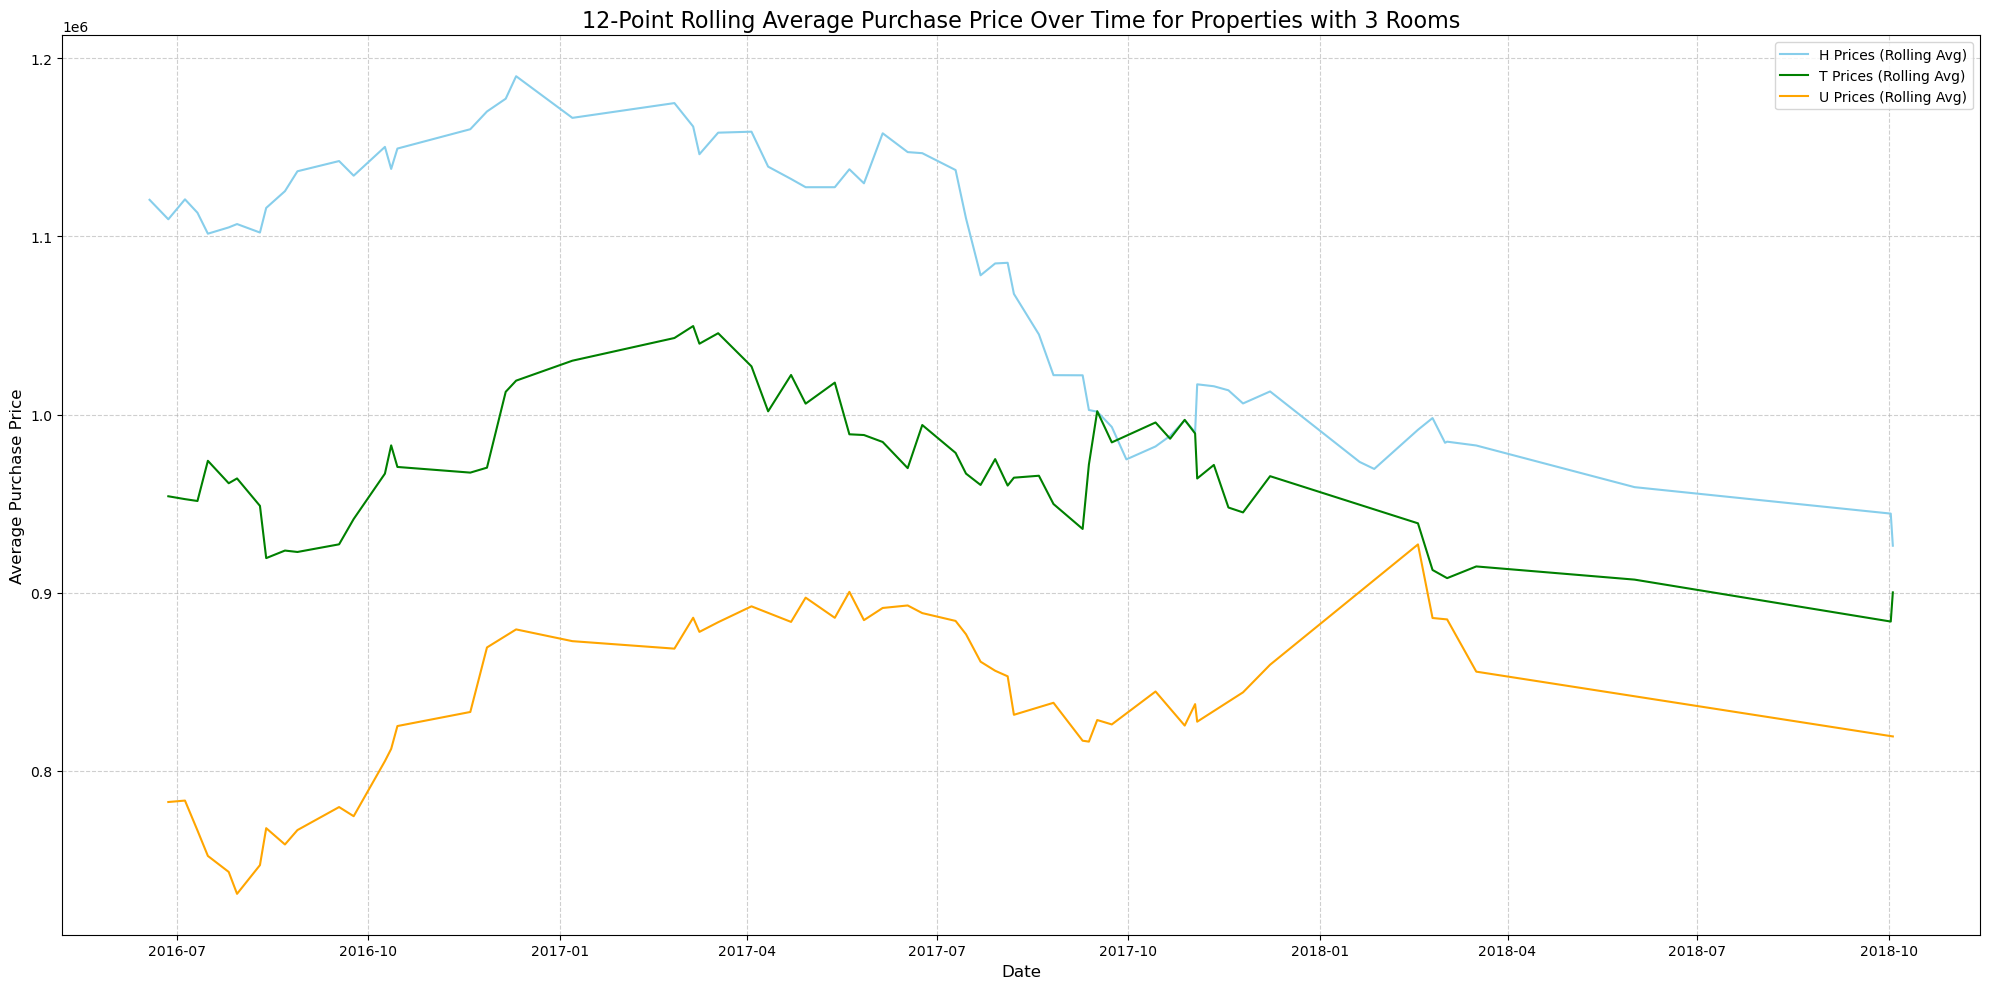

In [43]:
import matplotlib.pyplot as plt

# Convert 'Date' to datetime if it's not already
pty_df['Date'] = pd.to_datetime(pty_df['Date'])

# Filter the DataFrame for properties with three rooms
pty_df_three_rooms = pty_df[pty_df['Rooms'] == 3]

# Sort the filtered DataFrame by 'Date'
pty_df_three_rooms_sorted = pty_df_three_rooms.sort_values(by='Date')

# Group by 'Date' and 'Type', then calculate the average price
avg_price_by_type_date = pty_df_three_rooms_sorted.groupby(['Date', 'Type'])['Price'].mean().reset_index()

# Create a color map for different property types
color_map = {'h': 'skyblue', 'u': 'orange', 't': 'green'}

# Applying a 12-point rolling average to the data
rolling_avg_window_12 = 12
avg_price_by_type_date['Rolling_Avg_Price_12'] = avg_price_by_type_date.groupby('Type')['Price'].transform(lambda x: x.rolling(rolling_avg_window_12).mean())

# Create a line plot for each property type using the 12-point rolling average
plt.figure(figsize=(20, 10))

for Type, data in avg_price_by_type_date.groupby('Type'):
    plt.plot(data['Date'], data['Rolling_Avg_Price_12'], label=f'{Type.capitalize()} Prices (Rolling Avg)', color=color_map[Type])

# Add labels, title, legend, etc.
plt.title(f'12-Point Rolling Average Purchase Price Over Time for Properties with 3 Rooms', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Purchase Price', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

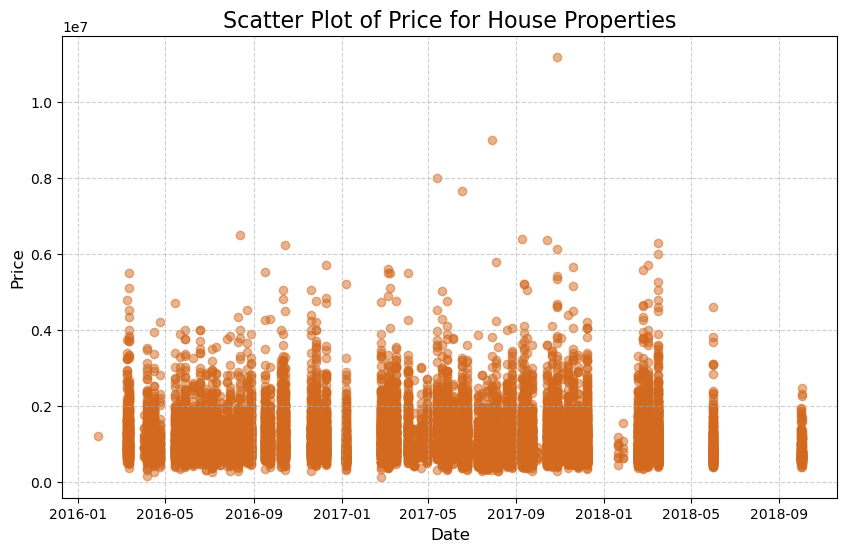

In [44]:
# Filter the DataFrame for house properties
house_df = pty_df[pty_df['Type'] == 'h']

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot for Date vs. Price
plt.scatter(house_df['Date'], house_df['Price'], color='chocolate', alpha=0.5)

# Add labels, title, and legend
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Scatter Plot of Price for House Properties', fontsize=16)

# Show the plot
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [45]:
# Filter the DataFrame for houses
house_df = pty_df[pty_df['Type'] == 'h']

# Calculate the average house price for each suburb
avg_price_by_suburb = house_df.groupby('Suburb')['Price'].mean().reset_index().round()

# Display the table
avg_price_by_suburb.sort_values("Price", ascending=False)

,Suburb,Price
111,East Melbourne,3134000.0
296,Toorak,3003781.0
61,Canterbury,2771942.0
193,Malvern,2724137.0
42,Brighton,2562454.0
...,...,...
201,Melton West,456421.0
200,Melton South,446224.0
199,Melton,435868.0
185,Kurunjang,393875.0


In [46]:
# Filter the DataFrame for units
units_df = pty_df[pty_df['Type'] == 'u']

# Calculate the average house price for each suburb
avg_unit_price_by_suburb = units_df.groupby('Suburb')['Price'].mean().reset_index().round()

# Display the table
avg_unit_price_by_suburb.sort_values("Price", ascending=False)

,Suburb,Price
94,Glen Waverley,984000.0
127,McKinnon,960000.0
31,Brighton,943000.0
73,East Melbourne,916562.0
17,Balwyn North,912192.0
...,...,...
168,Seaholme,312000.0
33,Broadmeadows,310000.0
119,Kingsville,302286.0
112,Jacana,280000.0


In [47]:
# Calculate price per square meter for each property
pty_df['Price_per_sqm'] = pty_df['Price'] / pty_df['Landsize']

# Group by suburb and calculate the statistics for price per square meter
price_per_sqm_stats_by_suburb = pty_df.groupby('Suburb')['Price_per_sqm'].agg(['max', 'min', 'mean']).reset_index()

# Rename the columns for clarity
price_per_sqm_stats_by_suburb.columns = ['Suburb', 'Max_Price_per_sqm', 'Min_Price_per_sqm', 'Avg_Price_per_sqm']

# Display the table
price_per_sqm_stats_by_suburb.sort_values("Suburb", ascending=False)
price_per_sqm_stats_by_suburb.round()

,Suburb,Max_Price_per_sqm,Min_Price_per_sqm,Avg_Price_per_sqm
0,Abbotsford,inf,254.0,NaN
1,Aberfeldie,inf,181.0,NaN
2,Airport West,inf,743.0,NaN
3,Albanvale,1904.0,913.0,1140.0
4,Albert Park,inf,956.0,NaN
...,...,...,...,...
328,Wonga Park,inf,inf,inf
329,Wyndham Vale,1625.0,646.0,1036.0
330,Yallambie,2707.0,921.0,1437.0
331,Yarra Glen,718.0,718.0,718.0


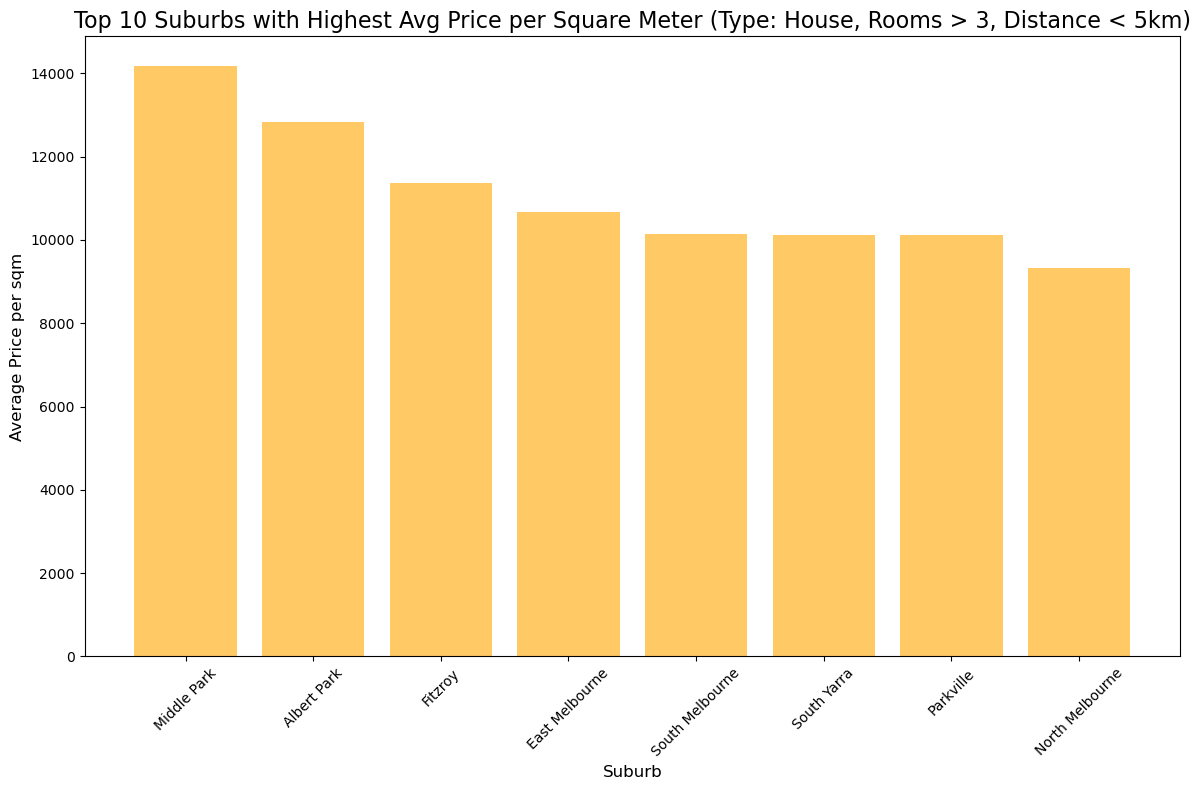

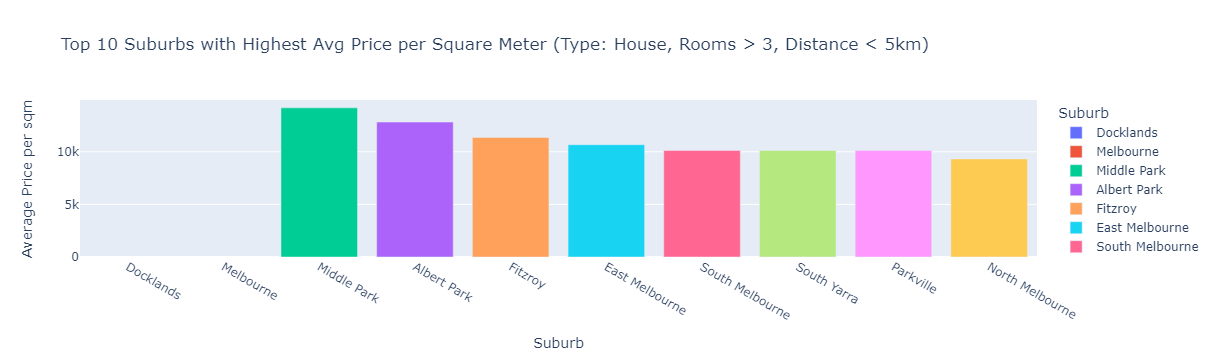

In [48]:
# Filter the DataFrame for properties with type 'house', more than 3 rooms, and a distance less than 5 km
pty_df_filtered = pty_df[(pty_df['Type'] == 'house') + (pty_df['Rooms'] > 3) & (pty_df['Distance'] < 5)]

# Calculate price per square meter for each property
pty_df_filtered['Price_per_sqm'] = pty_df_filtered['Price'] / pty_df_filtered['Landsize']

# Group by suburb and calculate the average price per square meter
avg_price_per_sqm_by_suburb = pty_df_filtered.groupby('Suburb')['Price_per_sqm'].mean().reset_index()

# Sort the DataFrame by Avg_Price_per_sqm in descending order
top_10_suburbs = avg_price_per_sqm_by_suburb.sort_values(by='Price_per_sqm', ascending=False).head(10)

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a bar plot for the top 10 suburbs with highest average price per sqm
plt.bar(top_10_suburbs['Suburb'], top_10_suburbs['Price_per_sqm'], color='orange', alpha=0.6)

# Add labels, title, and rotate x-axis labels for better readability
plt.xlabel('Suburb', fontsize=12)
plt.ylabel('Average Price per sqm', fontsize=12)
plt.title('Top 10 Suburbs with Highest Avg Price per Square Meter (Type: House, Rooms > 3, Distance < 5km)', fontsize=16)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()
import plotly.express as px
# Create an interactive bar chart
fig = px.bar(top_10_suburbs, x='Suburb', y='Price_per_sqm', color='Suburb',
             labels={'Price_per_sqm': 'Average Price per sqm'},
             title='Top 10 Suburbs with Highest Avg Price per Square Meter (Type: House, Rooms > 3, Distance < 5km)',
             hover_name='Suburb')

# Show the interactive plot
fig.show()

In [49]:
# which region and suburb combination are properties with multiple parking spaces and bathrooms most in demand, based on sale methods?
# Step 1: Filter the data
filtered_properties = pty_df[(pty_df['Car'] > 1) & (pty_df['Bathroom'] > 1)]

# Step 2: Group and Count
demand_by_combination = filtered_properties.groupby(['CouncilArea', 'Suburb', 'Method']).size().reset_index(name='PropertyCount')

# Find the combination with the highest demand
most_in_demand_combination = demand_by_combination[demand_by_combination['PropertyCount'] == demand_by_combination['PropertyCount'].max()]

most_in_demand_combination

,CouncilArea,Suburb,Method,PropertyCount
300,Glen Eira City Council,Bentleigh East,S,87


In [50]:
# How does the average price of properties with a specific number of rooms vary across different regions and council areas?
# Group by region, council area, and number of rooms, and calculate the average price
average_price_by_region_council_rooms = pty_df.groupby(['Suburb', 'CouncilArea', 'Rooms'])['Price'].mean().reset_index()

average_price_by_region_council_rooms.round().sort_values("Suburb", ascending=False)

,Suburb,CouncilArea,Rooms,Price
1221,Yarraville,Maribyrnong City Council,6,2450000.0
1220,Yarraville,Maribyrnong City Council,5,1413167.0
1219,Yarraville,Maribyrnong City Council,4,1290515.0
1218,Yarraville,Maribyrnong City Council,3,1046214.0
1217,Yarraville,Maribyrnong City Council,2,771223.0
...,...,...,...,...
8,Aberfeldie,Moonee Valley City Council,5,2028667.0
2,Abbotsford,Yarra City Council,3,1219938.0
1,Abbotsford,Yarra City Council,2,1009379.0
3,Abbotsford,Yarra City Council,4,1499250.0


In [51]:
# Step 1: Filter Data for 2016 and 2018
df_2016 = pty_df[pty_df['Date'].dt.year == 2016]
df_2018 = pty_df[pty_df['Date'].dt.year == 2018]

# Step 2: Calculate Average Prices
avg_price_2016 = df_2016.groupby('Suburb')['Price'].mean().reset_index()
avg_price_2018 = df_2018.groupby('Suburb')['Price'].mean().reset_index()

# Step 3: Calculate Price Increase Percentage
merged_df = avg_price_2016.merge(avg_price_2018, on='Suburb', suffixes=('_2016', '_2018'))
merged_df['Price_Increase_Percentage'] = ((merged_df['Price_2018'] - merged_df['Price_2016']) / merged_df['Price_2016']) * 100

# Sort by Price Increase Percentage in descending order
invest_suburbs = merged_df.sort_values(by='Price_Increase_Percentage', ascending=False)

invest_suburbs.round().sort_values("Price_Increase_Percentage", ascending=False)

,Suburb,Price_2016,Price_2018,Price_Increase_Percentage
47,Elwood,904969.0,2470000.0,173.0
115,St Kilda,813868.0,2160000.0,165.0
113,South Yarra,1001579.0,2437500.0,143.0
19,Box Hill,1243719.0,2909629.0,134.0
82,Kooyong,1290000.0,2900000.0,125.0
...,...,...,...,...
49,Essendon North,782100.0,710000.0,-9.0
3,Albert Park,1808303.0,1536000.0,-15.0
104,Princes Hill,1804000.0,1530000.0,-15.0
70,Hughesdale,1050729.0,815000.0,-22.0


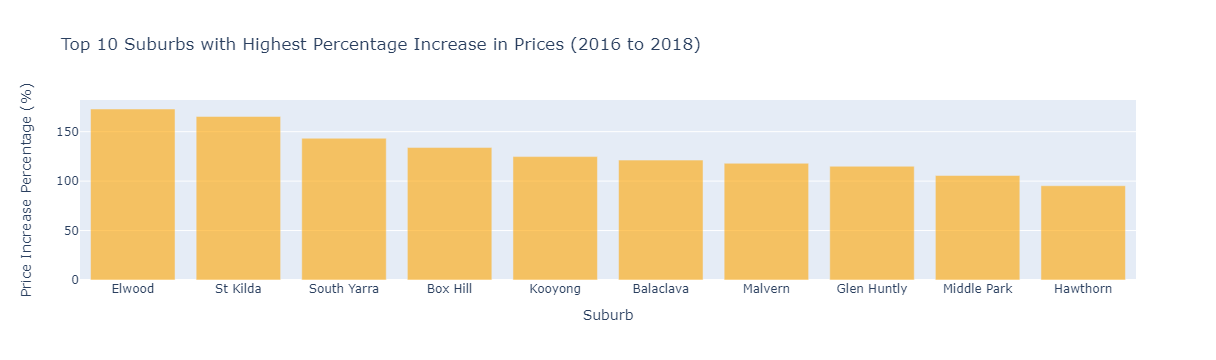

In [52]:
# Select the top 10 suburbs with highest percentage increase
top_10_suburbs = invest_suburbs.head(10)

# Create a bar trace
bar_trace = go.Bar(
    x=top_10_suburbs['Suburb'],
    y=top_10_suburbs['Price_Increase_Percentage'],
    marker_color='orange',
    opacity=0.6
)

# Create a layout for the figure
layout = go.Layout(
    title='Top 10 Suburbs with Highest Percentage Increase in Prices (2016 to 2018)',
    xaxis=dict(title='Suburb'),
    yaxis=dict(title='Price Increase Percentage (%)')
)

# Create the figure
fig = go.Figure(data=[bar_trace], layout=layout)

# Show the interactive plot
fig.show()

## 3.Investment Analysis

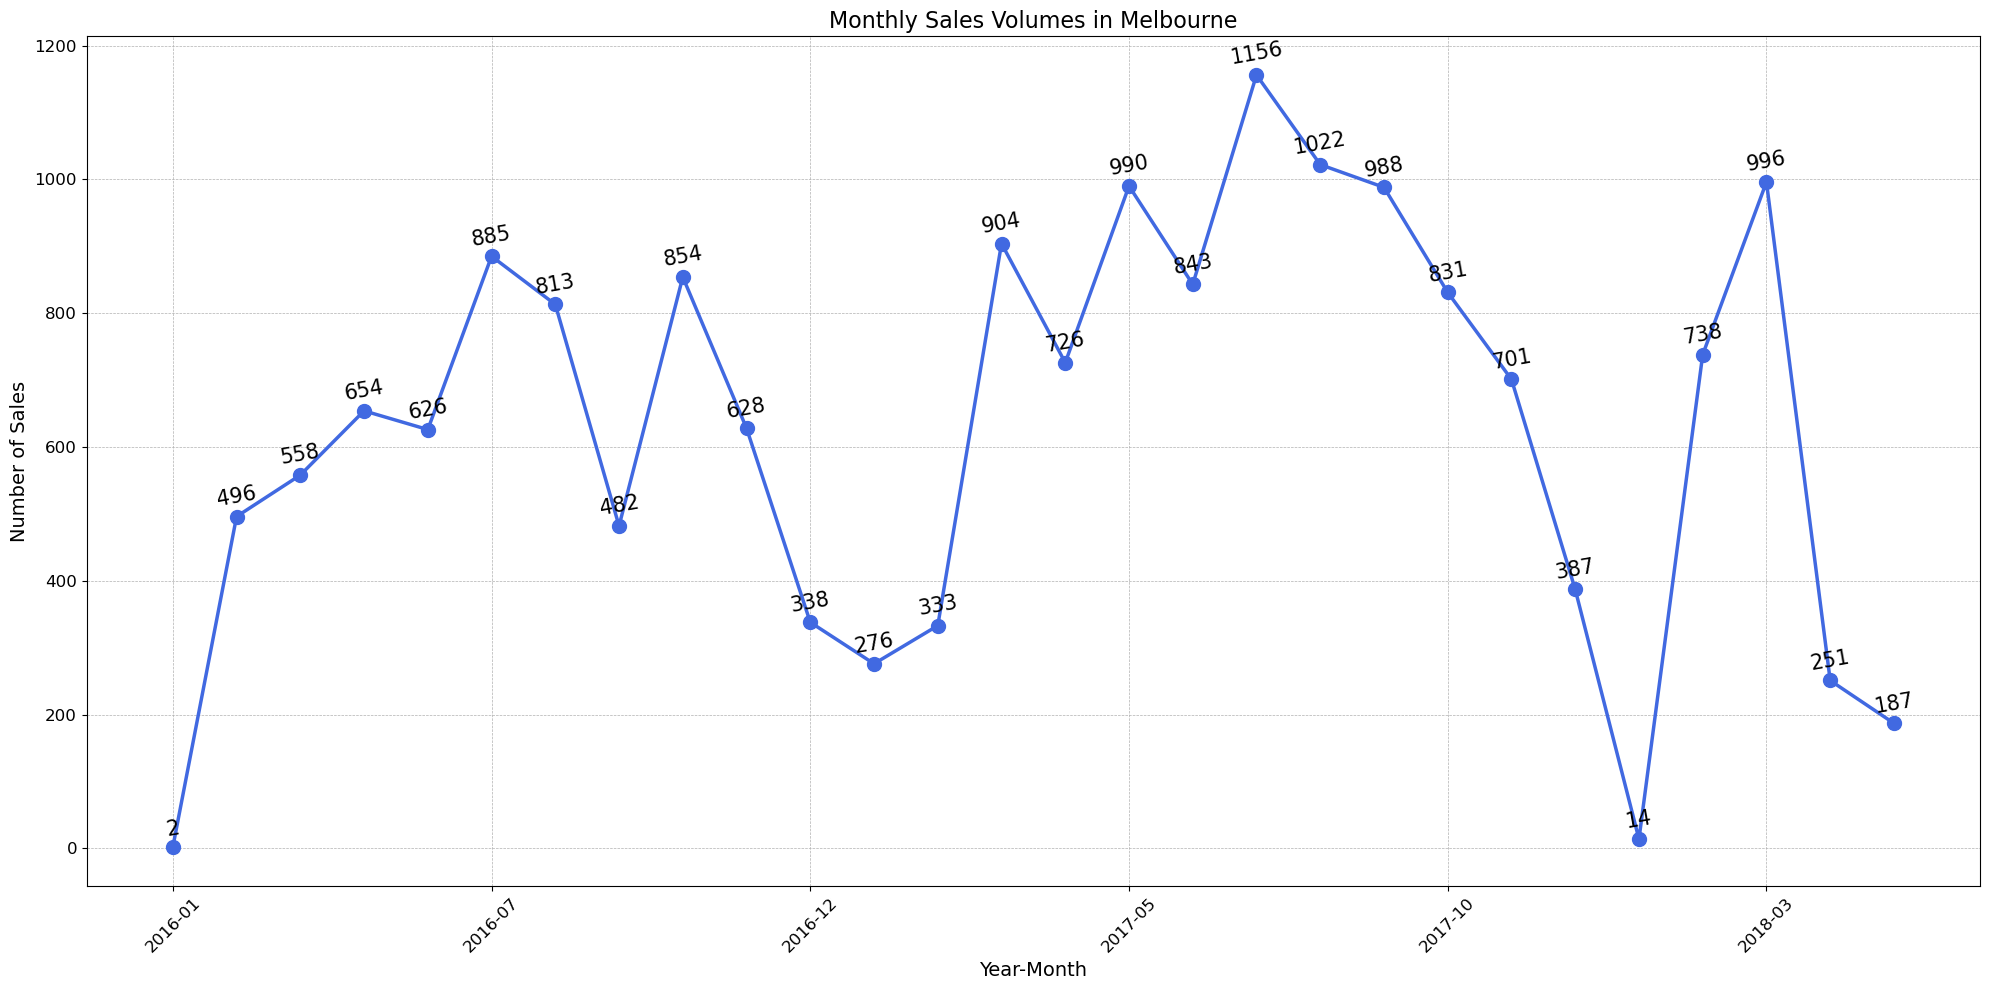

In [53]:
# Grouping by month and counting the number of sales
plt.figure(figsize=(20, 10))

# Convert the Date column to a "Year-Month" format
pty_df['Year_Month'] = pty_df['Date'].dt.strftime('%Y-%m')

# Group by the new "Year-Month" column to count the sales
sales_by_month = pty_df.groupby('Year_Month').size()

# Plotting
sales_by_month.plot(kind='line', color='royalblue', marker='o', markersize=10, linewidth=2.5)

for idx, (month, sale) in enumerate(sales_by_month.items()):
    label_pos = sale + 10
    plt.text(idx, label_pos, str(sale), ha='center', va='bottom', fontsize=15, rotation=10)
    
plt.title('Monthly Sales Volumes in Melbourne', fontsize=16)
plt.ylabel('Number of Sales', fontsize=14)
plt.xlabel('Year-Month', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

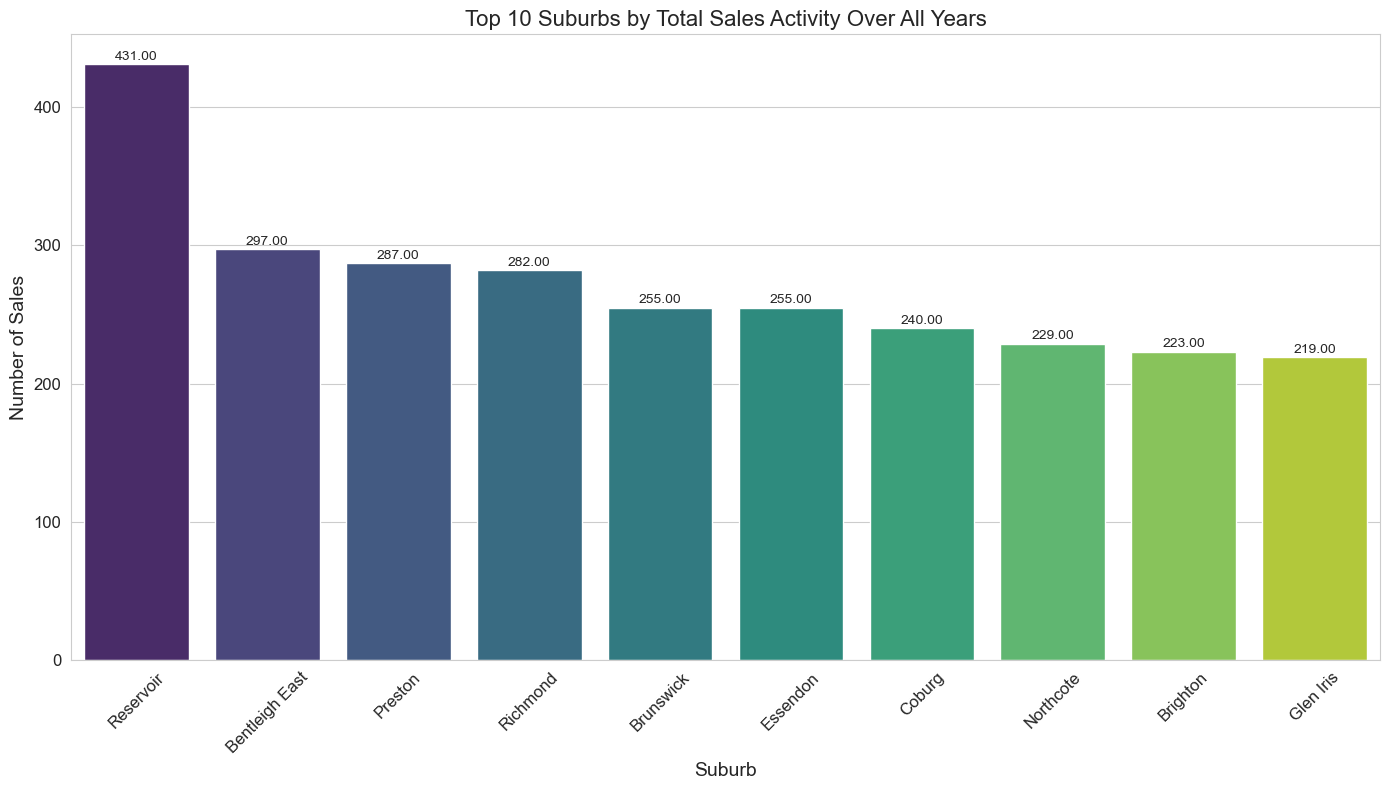

In [54]:
# Convert 'Date' column to datetime format
pty_df['Date'] = pd.to_datetime(pty_df['Date'])

# Extract year from 'Date'
pty_df['Year'] = pty_df['Date'].dt.year

# Group by suburb and year, then count the number of sales
suburb_yearly_sales = pty_df.groupby(['Suburb', 'Year']).size().unstack()

# Sum across years to get the total sales for each suburb over all years
suburb_total_sales = suburb_yearly_sales.sum(axis=1)

# Get the top 10 suburbs with the highest total sales over all years
top_suburbs = suburb_total_sales.sort_values(ascending=False).head(10)

# Improve the aesthetics using seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))
top_suburbs_plot = sns.barplot(x=top_suburbs.index, y=top_suburbs.values, palette="viridis")
top_suburbs_plot.set_title('Top 10 Suburbs by Total Sales Activity Over All Years', fontsize=16)
top_suburbs_plot.set_ylabel('Number of Sales', fontsize=14)
top_suburbs_plot.set_xlabel('Suburb', fontsize=14)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Displaying the exact average yearly sales value above each bar
for idx, value in enumerate(top_suburbs):
    plt.text(idx, value + 1, f"{value:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

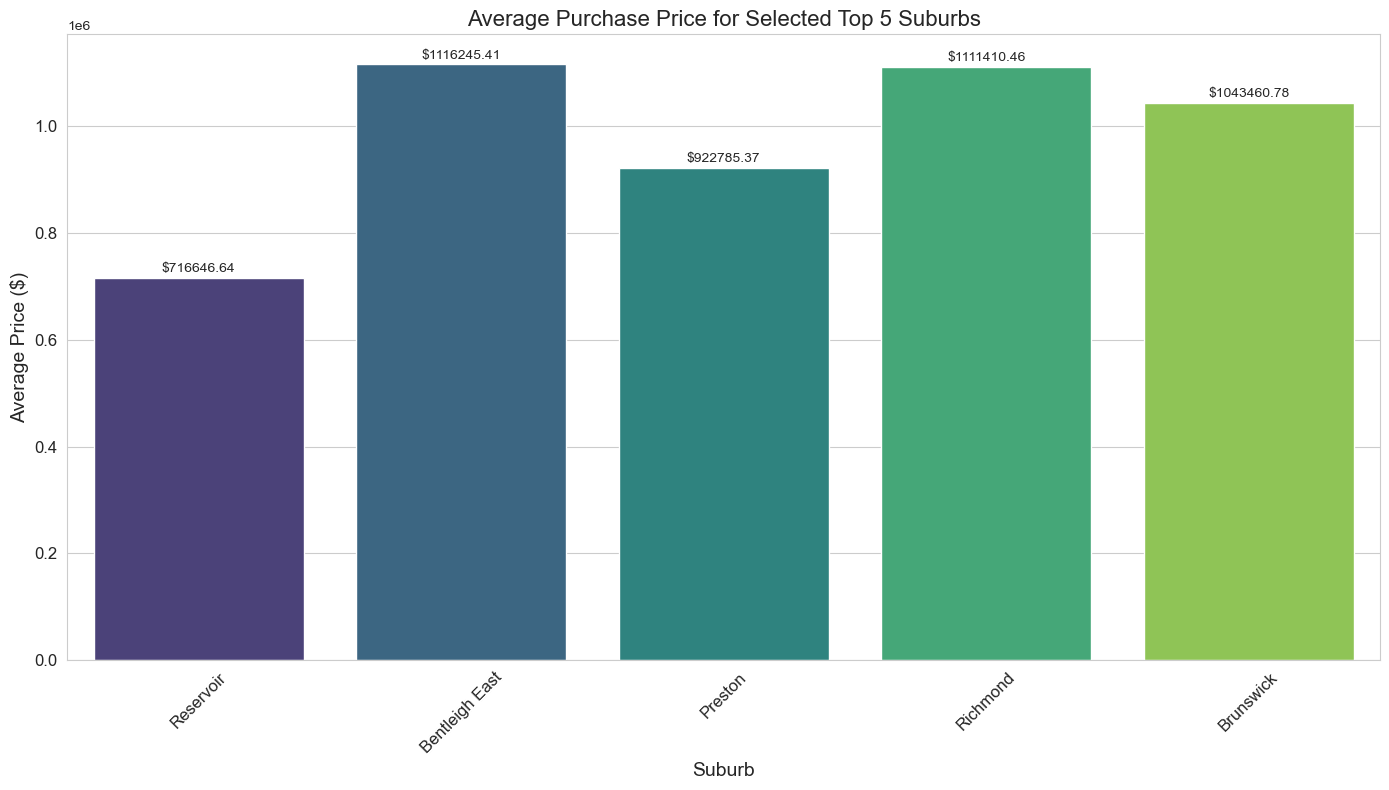

In [55]:
# Define the custom order for suburbs
custom_order = ["Reservoir", "Bentleigh East", "Preston", "Richmond", "Brunswick"]

# Calculate the average purchase price for the top 5 suburbs
average_price_top_5 = pty_df[pty_df['Suburb'].isin(custom_order)].groupby('Suburb')['Price'].mean()

# Order the average_price_top_suburbs based on the custom order
ordered_avg_price_custom = average_price_top_5.loc[custom_order]

# Plotting the ordered average purchase price for the top 5 suburbs based on the custom order
plt.figure(figsize=(14, 8))
ordered_avg_price_custom_plot = sns.barplot(x=ordered_avg_price_custom.index, y=ordered_avg_price_custom.values, palette="viridis")
ordered_avg_price_custom_plot.set_title('Average Purchase Price for Selected Top 5 Suburbs', fontsize=16)
ordered_avg_price_custom_plot.set_ylabel('Average Price ($)', fontsize=14)
ordered_avg_price_custom_plot.set_xlabel('Suburb', fontsize=14)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Displaying the exact average purchase price above each bar
for idx, value in enumerate(ordered_avg_price_custom):
    plt.text(idx, value + 5000, f"${value:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

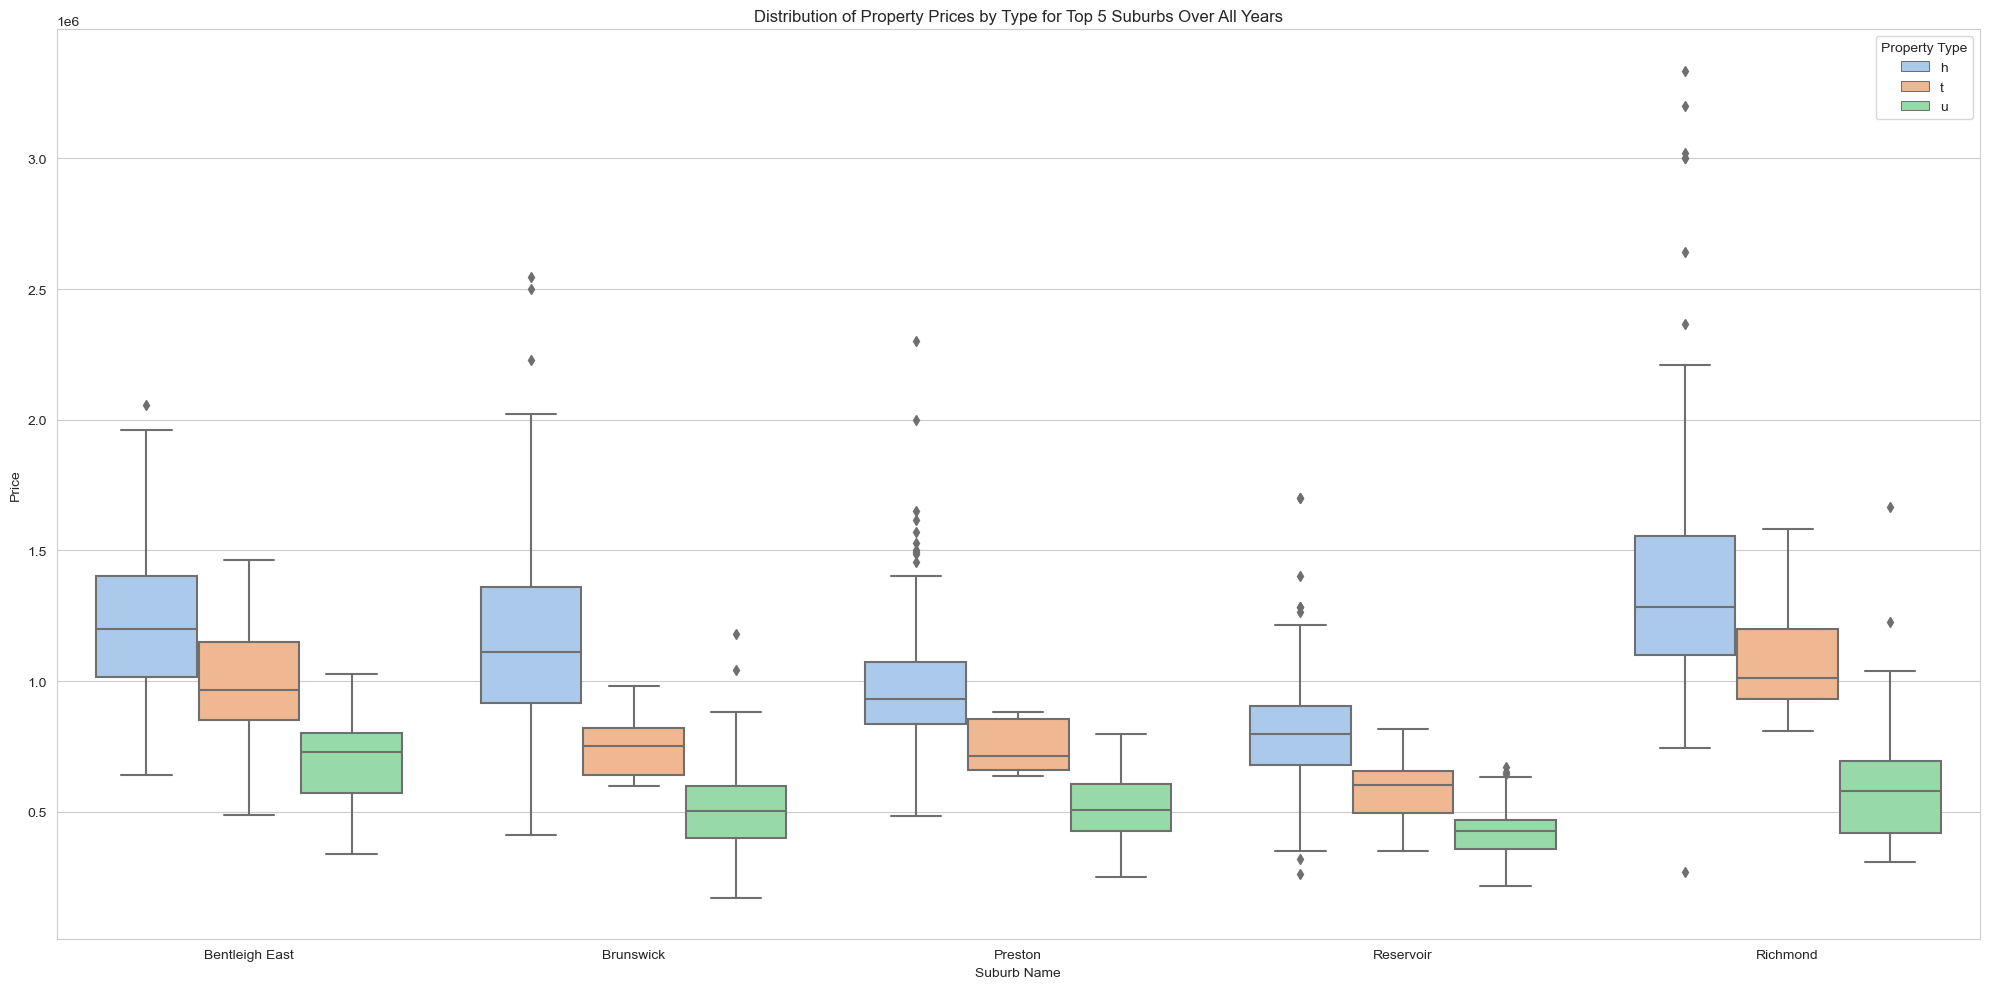

In [56]:
# Identifying the top 5 suburbs with the most sales activity over all years
top_suburbs_all_years = top_suburbs.head(5).index.tolist()

# Extracting data for the top suburbs
data_top_suburbs_all_years = pty_df[pty_df['Suburb'].isin(top_suburbs_all_years)]

# Generating the boxplot visualization
plt.figure(figsize=(20, 10))
sns.boxplot(x=data_top_suburbs_all_years['Suburb'], y=data_top_suburbs_all_years['Price'], hue=data_top_suburbs_all_years['Type'], palette="pastel")
plt.title('Distribution of Property Prices by Type for Top 5 Suburbs Over All Years')
plt.ylabel('Price')
plt.xlabel('Suburb Name')
plt.legend(title='Property Type')
plt.tight_layout()

plt.show()